In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
mem = pns.read_csv('/root/kalyan-thesis/jupyter/csv/mem.csv', parse_dates = [0], index_col = [0])


In [3]:
mem

,Mem_Resource
Date,
2021-04-04,65
2021-04-04,82
2021-04-04,90
2021-04-04,65
2021-04-04,65
...,...
2021-11-04,67
2021-11-04,66
2021-11-04,66


<AxesSubplot:xlabel='Date'>

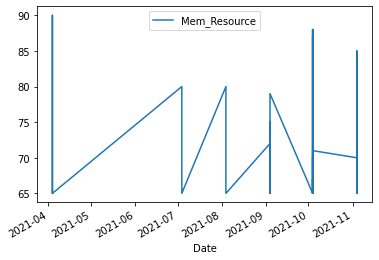

In [6]:
mem.plot()

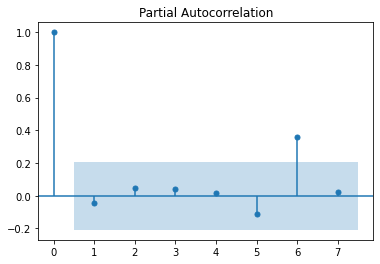

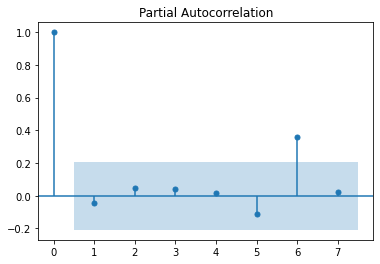

In [7]:
plot_pacf(mem, lags=7)

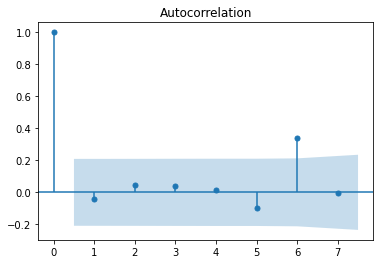

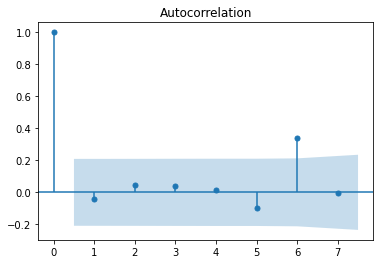

In [8]:
plot_acf(mem, lags=7)

In [9]:
mem.describe()

,Mem_Resource
count,88.000000
mean,68.113636
std,6.161489
min,65.000000
25%,65.000000
50%,66.000000
75%,67.000000
max,90.000000


In [10]:
mem_mod = ARIMA(mem, order=(1,1,0))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [11]:
mem_mod_fit = mem_mod.fit()


In [12]:
mem_mod_fit.aic


602.2538958473954

In [13]:
mem_forecast = mem_mod_fit.forecast(steps = 6)[0]


In [14]:
mem_forecast


array([66.46850744, 66.12484087, 66.23035597, 66.08744626, 66.0819306 ,
       66.00042766])

In [13]:
os.system("echo %s >> /root/kalyan-thesis/jupyter/output/mem_pred_output"%mem_forecast)

0